# Cohort Analysis

### Data analysis workflow

#### By Selene Reyes

## Table of Content

1. [DATA](#data)<br>
2. [EXPLORATORY DATA ANALYSIS](#eda)<br>
3. [COHORT ANALYSIS](#cohort)<br>
4. [CUSTOMER LIFETIME VALUE](#clv)<br>

### Importing libraries

In [12]:
from urllib.request import urlretrieve
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from scipy import stats
import datetime as dt
from datetime import datetime, date, timedelta
#from pandas import set_option

<a id='data'></a>
# 1. Data

This data set contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based online retail business. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

 __Data source:__ <br>
UCI Machine Learning Repository   __[Link to dataset](https://archive.ics.uci.edu/ml/datasets/Online%20Retail)__

<a id='eda'></a>
# 2. EDA

In [20]:
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'

In [24]:
urlretrieve(URL, 'online_retail.xlsx')

('online_retail.xlsx', <http.client.HTTPMessage at 0x1058bd588>)

In [30]:
xls = pd.ExcelFile("online_retail.xlsx")
online = pd.read_excel(xls, parse_dates = ['InvoiceDate'])
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [31]:
online.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70864 entries, 416792 to 312243
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    70864 non-null  int64         
 1   StockCode    70864 non-null  object        
 2   Description  70864 non-null  object        
 3   Quantity     70864 non-null  int64         
 4   InvoiceDate  70864 non-null  datetime64[ns]
 5   UnitPrice    70864 non-null  float64       
 6   CustomerID   70864 non-null  int64         
 7   Country      70864 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 4.9+ MB


<a id='cohort'></a>
# 3. Cohort Analysis
Cohort: group of people who have become a customer around the same time

### It groups customers into different behavioral segments. It allows to:

> ### -  Evolution over time (long term relationship) 
> ### -  Compare cohort groups over time (and product lifetime) <br>


![Cohort](dir-python/Cohort.png)<br><br>


## 3.1 Time cohort (monthly)
Shows the customers’ behavior depending on the time they start using the product or services (monthly, quarterly)

We will create monthly cohorts, based on the month each customer has made their first transaction.<br>
### ==> Adding: 'InvoiceMonth' and 'CohortMonth' columns

In [9]:
def get_month(x): 
    """
    Returns parsed date (YYYY-MM-01)

    Parameters
    ----------
    x: array of dates
    """
    return dt.datetime(x.year, x.month, 1) 

In [10]:
online['InvoiceDate'].apply(get_month) 

416792   2011-10-01
482904   2011-11-01
263743   2011-07-01
495549   2011-11-01
204384   2011-05-01
            ...    
448575   2011-11-01
19970    2010-12-01
264154   2011-07-01
199822   2011-05-01
312243   2011-08-01
Name: InvoiceDate, Length: 70864, dtype: datetime64[ns]

In [ ]:
online.groupby('CustomerID')['InvoiceMonth'] 

In [527]:
# InvoiceDay column
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month) 

# Grouping by CustomerID and selecting the InvoiceDay value
grouping = online.groupby('CustomerID')['InvoiceMonth'] 

# Assigning a minimum InvoiceDay value to the dataset
online['CohortMonth'] = grouping.transform('min')

online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.1,14286,United Kingdom,2011-10-01,2011-04-01
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.4,16360,United Kingdom,2011-11-01,2011-09-01
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.8,13933,United Kingdom,2011-07-01,2011-07-01
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.1,17290,United Kingdom,2011-11-01,2011-11-01
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,6.0,17663,United Kingdom,2011-05-01,2011-02-01


In [7]:
type(online['InvoiceDate'])

pandas.core.series.Series

### ==> Time offset: number of months between any trasaction and the first trasactions of each customer.

In [528]:
def get_date_int(df, column):
    """Extract year, month, and day integer values
        
    Args:
        arg_1 (df):
        arg_2 (str): column name with datetime values
    
    Returns:
        int(year), int(months), int(days)
    """
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    
    return year, month, day

In [529]:
# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month, invoice_day = get_date_int(online, 'InvoiceMonth')

# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, cohort_day = get_date_int(online, 'CohortMonth')

### $$ CohortIndex = InvoiceMonth - CohortMonth $$

In [530]:
# Difference in years between the moment of the invoice and the moment the cohort was created 
years_diff =  invoice_year - cohort_year

# Calculate difference in months between the moment of the invoice and the moment the cohort was created 
months_diff = invoice_month - cohort_month


# Extract the difference in months from all previous values and
# Assign the monthly time offset to each transaction
online['CohortIndex'] = years_diff * 12 + months_diff + 1
online.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.1,14286,United Kingdom,2011-10-01,2011-04-01,7
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.4,16360,United Kingdom,2011-11-01,2011-09-01,3
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.8,13933,United Kingdom,2011-07-01,2011-07-01,1


## Metrics

### <font color=blue> Retention</font>
### $$ Retention =\frac{Active Customers}{Total Customers} $$
  <t>How many customers originally in each cohort have return in the subsequent mont?

Steps:<br>
a) Select the first column (total number of customers in the cohort)<br>
b) Calculate the ratio of how many of these customers were active in the following months

In [567]:
grouping = online.groupby(['CohortMonth','CohortIndex'])

# Number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

cohort_data['CohortMonth'] = cohort_data.CohortMonth.dt.date

cohort_counts = cohort_data.pivot(index='CohortMonth', 
                                  columns='CohortIndex', 
                                  values='CustomerID')

# First column stored as cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0).mul(100)

#set_option('display.width', 120)
#set_option('precision', 1)
#print('MONTHLY ACQUISITION COHORT\n')
#print(cohort_counts.round(0))
#print()
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
#plt.figure(figsize=(12, 8))
#plt.title('MONTHLY ACQUISITION COHORT\n')
#sns.heatmap(data=cohort_counts, annot=True, cmap='RdYlBu', fmt='.0f', vmin=0, vmax=350);
#print()
#plt.figure(figsize=(12, 8))
#plt.title('MONTHLY RETENTION RATE (%)\n')
#sns.heatmap(data=retention, annot=True, cmap='RdYlBu', vmin=15, vmax=45);
#print()

### <font color=blue> Churn </font>
### $$ Churn = 1 - Retention $$

In [451]:
# Churn Rate
churn = 1 - retention

#plt.figure(figsize=(12, 8))
#plt.title('MONTHLY CHURN RATE\n')
#sns.heatmap(data=churn, annot=True, cmap='Blues', fmt='.2f');

## 3.2 Size cohorts

Amount of spending over a period of time, or the product type the customer spend more.

### <font color=blue>__Average Order Value (AOV)__</font>
Are there any differences in shopping patterns across time and across cohorts?

In [543]:
# Calculate total amount spent per invoice
online['Amount'] = online.Quantity * online.UnitPrice
online.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,Amount
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.1,14286,United Kingdom,2011-10-01,2011-04-01,7,12.6
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.4,16360,United Kingdom,2011-11-01,2011-09-01,3,1.4


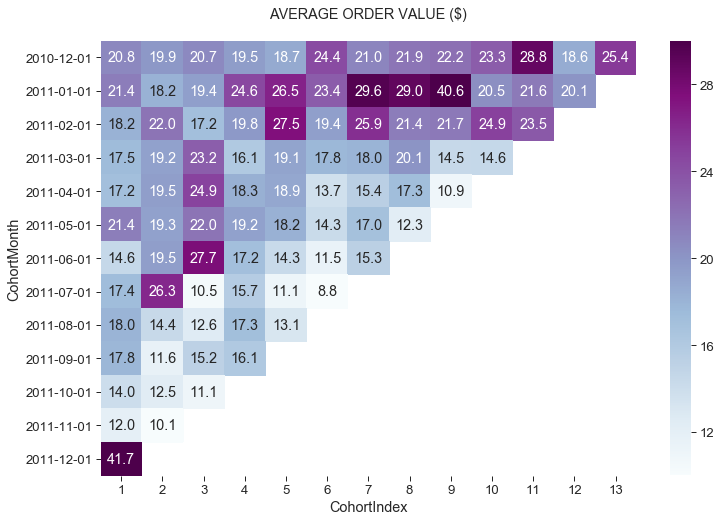

In [566]:
grouping = online.groupby(['CohortMonth', 'CohortIndex']) 

# Average amount spent by monthly cohort
cohort_data = grouping['Amount'].mean().reset_index()

cohort_data['CohortMonth'] = cohort_data.CohortMonth.dt.date

average_spent = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Amount')

plt.figure(figsize=(12, 8))
plt.title('AVERAGE ORDER VALUE ($)\n')
sns.heatmap(data=average_spent, annot=True, cmap='BuPu', fmt='.1f', vmin=10, vmax=30);

### <font color=blue>Average quantity</font>

In [454]:
# Average quantity by monthly cohort
cohort_data = grouping['Quantity'].mean().reset_index()

cohort_data['CohortMonth'] = cohort_data.CohortMonth.dt.date
 
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')

#plt.figure(figsize=(12, 8))
#plt.title('AVERAGE QUANTITY ORDER BY MONTHLY COHORTS\n')
#sns.heatmap(data=average_quantity, annot=True, cmap='Blues', fmt='.1f');

### <font color=blue>Average Unit Price</font>

In [455]:
# Average of the unit price 
cohort_data = grouping['UnitPrice'].mean().reset_index()

cohort_data['CohortMonth'] = cohort_data.CohortMonth.dt.date

# Create a pivot 
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')

#plt.figure(figsize=(12, 8))
#plt.title('AVERAGE UNIT PRICE BY MONTHLY COHORTS\n')
#sns.heatmap(data=average_price, annot=True, cmap='Greens', fmt='.2f');

<a id='clv'></a>
# 4. Customer Lifetime Value

### GOAL: 
* ### Measure customer value in revenue or profit
* ### Benchmark customers and asses the max investment into customer acquisition<br><br>

![CLV](dir-python/CLV.png)

## 4.1 Traditional CLV 

### Most popular approach
#### Accounts for customer loyalty<br>
### $$ \text Taditional CLV = (Avg Revenue * Profit Margin) * \frac {Retention Rate}{Churn Rate}$$



In [456]:
# Mean retention rate
retention_rate = retention.iloc[:,1:].mean().mean()

# Mean churn rate
churn_rate = churn.iloc[:,1:].mean().mean()

print('Retention rate: {:.2f}; Churn rate: {:.2f}'.format(retention_rate, churn_rate))

Retention rate: 0.24; Churn rate: 0.76


In [457]:
# Monthly spend per customer
monthly_revenue = online.groupby(['CustomerID','InvoiceMonth'])['Amount'].sum().mean()

# Average monthly retention rate
retention_rate = retention.iloc[:,1:].mean().mean()

# Average monthly churn rate
churn_rate = 1 - retention_rate

# Calculate traditional CLV 
clv_traditional = monthly_revenue * (retention_rate / churn_rate)

print('Average traditional CLV is {:.1f} USD at {:.1f} % retention_rate'.format(
    clv_traditional, retention_rate*100))

Average traditional CLV is 42.4 USD at 24.2 % retention_rate
